In [214]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  #| 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.ocrdata2 import load_dataset
from dataset.mnist import load_mnist
from net.deep_convnet2 import DeepConvNet
from common.trainer import Trainer
import pickle
(x_train, t_train), (x_test, t_test) = load_dataset()
save_path =  '/Users/yunsu/Desktop/book_reading/study_by_self/load/ocrparams/E_D_all_ver3_FNT1_FNx1.pk1'
file_path = None

network = DeepConvNet(output_size=62, file_path=file_path)  
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=15, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train(save_path=save_path)



making data pickles
done
[   9  288  288  576  576 1152 2048  100]
0
train loss:3.41222435653
1th epoch end: Saved Network Parameters!
=== epoch:1, train acc:0.047, test acc:0.04 ===
1
train loss:3.75441295471
2
train loss:4.06960548189
3
train loss:4.14561245352
4
train loss:4.11325875462
5
train loss:4.25375497916
6
train loss:4.1333732205
7
train loss:4.15474596848
8
train loss:4.07204194176
9
train loss:3.95048940126
10
train loss:4.0817532933
11
train loss:3.86940427547
12
train loss:3.98279460299
13
train loss:3.88839344849
14
train loss:3.78538258092
15
train loss:3.68577401946
16
train loss:3.75918959038
17
train loss:3.62367013314
18
train loss:3.79671009735
19
train loss:3.7331729191
20
train loss:3.43174759335
21
train loss:3.42358501498
22
train loss:3.29468560741
23
train loss:3.40900257339
24
train loss:3.18306171523
25
train loss:3.0313851092
26
train loss:3.19408735684
27
train loss:3.15813088728
28
train loss:3.24775418227
29
train loss:3.03029318275
30
train loss:2.88

KeyboardInterrupt: 

In [218]:
trainer.test_acc_list

[0.040000000000000001,
 0.88200000000000001,
 0.89300000000000002,
 0.92200000000000004,
 0.93300000000000005,
 0.92900000000000005,
 0.93500000000000005,
 0.93500000000000005,
 0.93100000000000005,
 0.93700000000000006,
 0.92800000000000005,
 0.93400000000000005,
 0.93100000000000005,
 0.93999999999999995,
 0.93700000000000006]

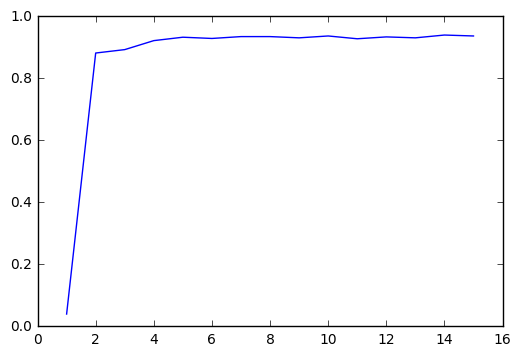

In [219]:
plt.plot(range(1,16), trainer.test_acc_list)
plt.show()

In [164]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


In [198]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import string
import matplotlib.pyplot as plt
from dataset.ocrdata2_1 import load_dataset
from net.deep_convnet2 import DeepConvNet
import pickle
(x_train, t_train), (x_test, t_test) = load_dataset()
# path = '/Users/yunsu/Desktop/book_reading/study_by_self/load/ocrparams/revised_data/E_D_all_FNx1.pk1'
path =  '/Users/yunsu/Desktop/book_reading/study_by_self/load/ocrparams/E_D_all.pk1'
# path = '/Users/yunsu/Desktop/book_reading/study_by_self/load/ocrparams/E_D_all_FNx1_FNT2_1.pk1'
# path = '/Users/yunsu/Desktop/book_reading/study_by_self/load/ocrparams/E_D_all_FNx1_FNT1_1.pk1'

net= DeepConvNet(output_size=62, file_path=path)

loadind data pickles
done
loading param pickles
done


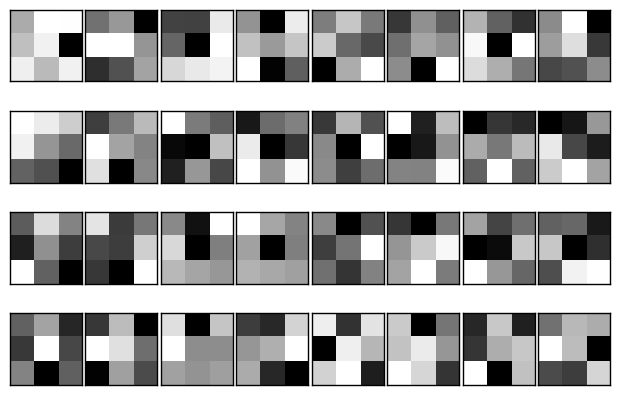

In [199]:
filter_show(net.params['W1'])

In [200]:
batch = x_test[3000:4000]

In [201]:
y = np.argmax(net.predict(batch), axis=1)

In [202]:
y_ = t_test[3000:4000]

In [203]:
mask_ = np.equal(y, y_)

In [204]:
mask = True ^ mask_

In [205]:
y[mask]

array([47, 57, 60, 61, 54, 50, 52, 32, 56, 50, 34, 40, 33, 53, 58, 61, 57,
       43, 61, 50, 35, 25, 12, 33])

In [206]:
y_[mask]

array([21, 31, 34, 35, 28,  0, 26, 58, 30, 24, 53, 14, 59, 27, 32, 35, 31,
       17, 35, 24, 61, 27, 38, 59], dtype=uint8)

In [207]:
infer = y[mask]
answer = y_[mask]

In [208]:
len(infer)
len(answer)

24

In [209]:
i = 0
kv = {}
for a, b in zip(infer, answer):
    if a + 26 == b or a - 26 == b:
        i += 1
i

21

In [210]:
i = 0
kv = {}
for a, b in zip(infer, answer):
    print(dic[a], dic[b],a, b)
i

l l 47 21
v v 57 31
y y 60 34
z z 61 35
s s 54 28
o 0 50 0
q q 52 26
w w 32 58
u u 56 30
o o 50 24
y r 34 53
e e 40 14
x x 33 59
r r 53 27
w w 58 32
z z 61 35
v v 57 31
h h 43 17
z z 61 35
o o 50 24
z z 35 61
p r 25 27
c c 12 38
x x 33 59


0

In [ ]:
r과 n, i와 l(소문자 엘), z와 2, 

In [31]:
dic = list(range(10)) + list(string.ascii_lowercase) + list(string.ascii_lowercase)

In [40]:
dic[35]

'z'

In [41]:
dic[61]

'z'